# Feed-forward
* MNIST
* DataLoader, Transformation
* Multilayer Neural Net, activation function
* Loss and Optimizer
* Training Loop (batch training)
* Model evaluation
* GPU support

In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# hyper parameters
input_size = 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='./data', train = True,\
                    transform = transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train = False,\
                    transform = transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, \
                    shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, \
                    shuffle=False)
                
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


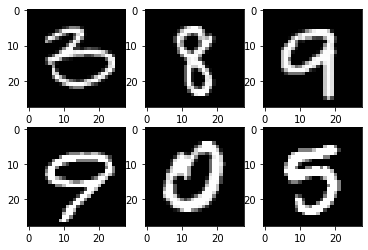

In [6]:
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [12]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predictions = torch.max(outputs, 1)
        n_samples += labels.shape[0]
        n_correct = (predictions == labels).sum().item()

    acc = 100.0* n_correct /n_samples
    print(f'accuracy {acc:.4f}')

Epoch [1/2], Step [100/600], Loss: 0.5247
Epoch [1/2], Step [200/600], Loss: 0.3925
Epoch [1/2], Step [300/600], Loss: 0.3714
Epoch [1/2], Step [400/600], Loss: 0.2534
Epoch [1/2], Step [500/600], Loss: 0.2801
Epoch [1/2], Step [600/600], Loss: 0.3190
Epoch [2/2], Step [100/600], Loss: 0.2041
Epoch [2/2], Step [200/600], Loss: 0.2465
Epoch [2/2], Step [300/600], Loss: 0.1126
Epoch [2/2], Step [400/600], Loss: 0.2820
Epoch [2/2], Step [500/600], Loss: 0.3413
Epoch [2/2], Step [600/600], Loss: 0.2377
accuracy 0.9200
